## Homework - Machine Learning Preparation
Anggota :
1. Nizar Mochammad Yusuf
2. Attariq Muhammad Kasfilla
3. Muhammad Rahmat Darmawan




**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from imblearn import over_sampling, under_sampling

%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.20.1
pandas version :  1.2.4
seaborn version :  0.11.1


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [3]:
df = pd.read_csv('Product_Exclusive_Classification.csv')
df.head()

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0
1,304,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
2,404,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
3,443,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
4,463,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0


## Describe Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


### Numerik Data

In [5]:
# mengambil kolom numerik atau kategori

# numerik
num_dtypes = ['int64','float64']
num_df = df.select_dtypes(num_dtypes)
numerik = num_df.columns

df[numerik].describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,8.000000e+03,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
mean,1.910231e+06,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,3.858353e+05,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,1.773379e+06,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,2.030360e+06,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,2.185074e+06,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000
max,2.293801e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.000000,1.000000


### Kategori Data

In [6]:
# kategori
cat_dtypes = ['object']
cat_df = df.select_dtypes(cat_dtypes)
kategori = cat_df.columns

df[kategori].describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


## Missing Value (5 Poin)

In [7]:
df.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [8]:
# drop data null
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7828 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7828 non-null   int64  
 1   brand              7828 non-null   object 
 2   category           7828 non-null   object 
 3   rating             7828 non-null   float64
 4   number_of_reviews  7828 non-null   float64
 5   love               7828 non-null   float64
 6   price              7828 non-null   float64
 7   value_price        7828 non-null   float64
 8   exclusive          7828 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 611.6+ KB


## Duplicate Values (5 Poin)

> Pemblokiran indentasi



In [9]:
df_clean.head()

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0
1,304,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
2,404,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
3,443,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
4,463,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0


In [10]:
df_clean.duplicated().sum()

0

In [11]:
# duplicate data by id
df_clean.duplicated(subset='id').sum()

46

In [12]:
df_clean.duplicated(subset=['id','brand']).sum()

46

In [13]:
df_clean.duplicated(subset=['id','brand','category']).sum()

27

In [14]:
# duplicate data by except number_of_reviews 
df_clean.duplicated(subset=['id','brand','category','price','value_price','exclusive']).sum()

27

In [15]:
# drop data dupicalte by ['id','brand','category']
df_clean.drop_duplicates(subset=['id','brand','category'], inplace=True, keep='first')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7801 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7801 non-null   int64  
 1   brand              7801 non-null   object 
 2   category           7801 non-null   object 
 3   rating             7801 non-null   float64
 4   number_of_reviews  7801 non-null   float64
 5   love               7801 non-null   float64
 6   price              7801 non-null   float64
 7   value_price        7801 non-null   float64
 8   exclusive          7801 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 609.5+ KB


## Outliers (5 Poin)

### Z-score

In [16]:
# Menghapus outlier berdasarkan Z-score (Rating saja)
print(f'Jumlah baris sebelum memfilter outlier: {len(df_clean)}')

filtered_entries = np.array([True] * len(df_clean))

# for col in numerik:
#     zscore = abs(stats.zscore(df_clean[col])) # hitung absolute z-scorenya
#     filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
#     print(f'Jumlah baris setelah memfilter outlier: {len(df_clean)}')

zscore = abs(stats.zscore(df_clean[numerik[1]])) # hitung absolute z-scorenya
filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

    
df_clean = df_clean[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_clean)}')

Jumlah baris sebelum memfilter outlier: 7801
Jumlah baris setelah memfilter outlier: 7644


### IQR

In [17]:
# Menghapus outlier berdasarkan IQR (Selain rating saja)
print(f'Jumlah baris sebelum memfilter outlier: {len(df_clean)}')

for j in numerik[2:6]:
    Q1 = df_clean[j].quantile(0.25) 
    Q3 = df_clean[j].quantile(0.75) 
    IQR = Q3 - Q1 
    low_limit = Q1 - (1.5 * IQR) 
    high_limit = Q3 + (1.5 * IQR) 
    filtered_entries = ((df_clean[j] >= low_limit) & (df_clean[j] <= high_limit)) 

df_clean = df_clean[filtered_entries]
print(f'Jumlah baris sebelum memfilter outlier: {len(df_clean)}')

Jumlah baris sebelum memfilter outlier: 7644
Jumlah baris sebelum memfilter outlier: 7000


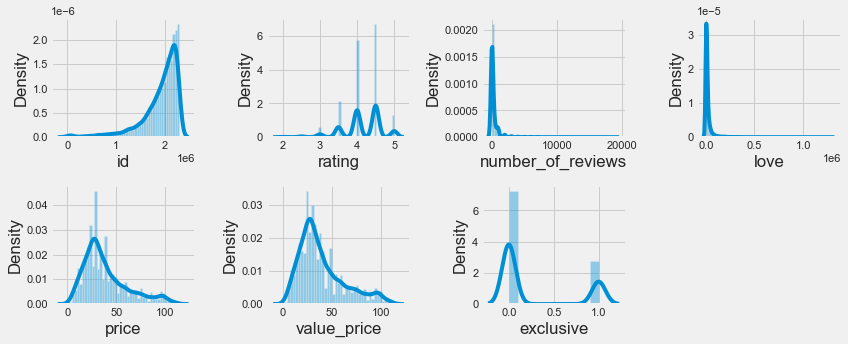

In [18]:
plt.figure(figsize=(12, 5))
for i in range(0, len(numerik)):
    plt.subplot(2, round(len(numerik)/2), i+1)
    sns.distplot(df_clean[numerik[i]])
    plt.tight_layout()

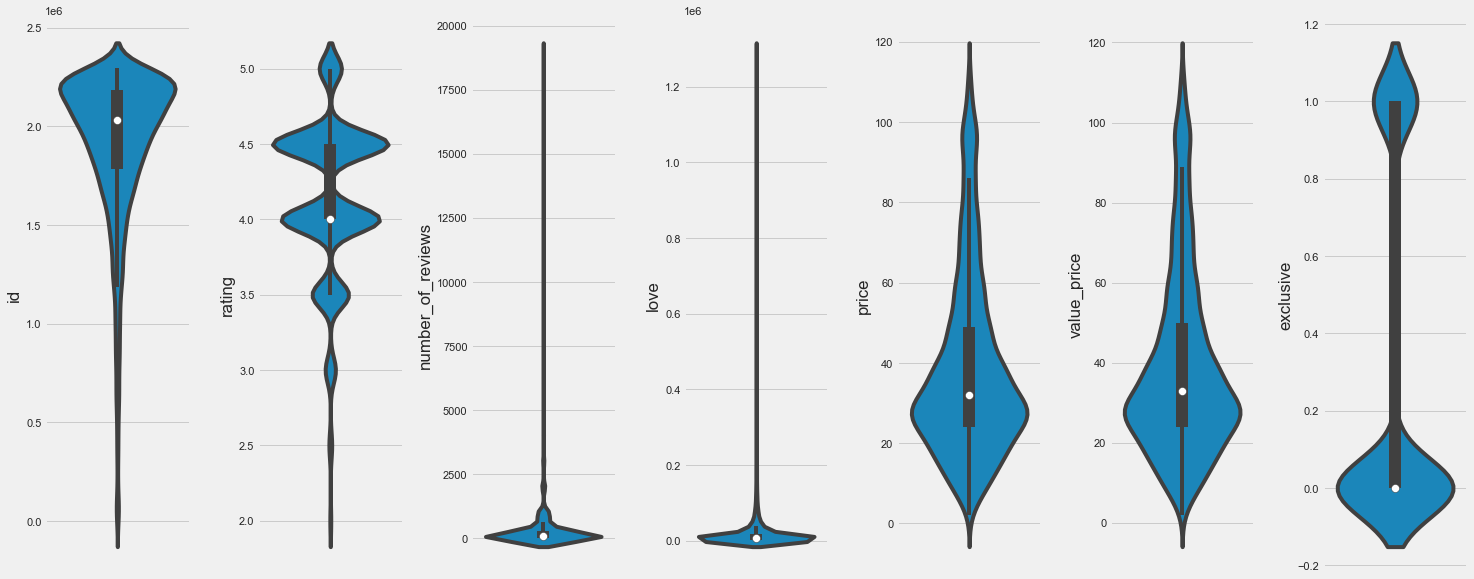

In [19]:
for i in range(0, len(numerik)):
    plt.subplot(1, len(numerik), i+1)
    sns.violinplot(y=df_clean[numerik[i]], orient='v')
    plt.tight_layout()

## Normalization/Standardization (5 Poin)


In [20]:
# Feature Scaler Using MinMaxScaler()
scaler = MinMaxScaler()
scaler.fit(df_clean[numerik])
df_clean_scale = scaler.transform(df_clean[numerik])
df_clean_scale


array([[0.00000000e+00, 1.00000000e+00, 2.36854571e-03, ...,
        4.36363636e-01, 4.36363636e-01, 0.00000000e+00],
       [2.82420480e-03, 8.33333333e-01, 4.89499447e-03, ...,
        6.90909091e-01, 6.90909091e-01, 0.00000000e+00],
       [3.20131767e-03, 1.00000000e+00, 1.57903048e-03, ...,
        8.36363636e-01, 8.36363636e-01, 0.00000000e+00],
       ...,
       [9.99845667e-01, 6.66666667e-01, 1.52639613e-03, ...,
        4.81818182e-01, 4.81818182e-01, 0.00000000e+00],
       [9.99867030e-01, 8.33333333e-01, 1.10532133e-03, ...,
        2.45454545e-01, 2.90909091e-01, 1.00000000e+00],
       [1.00000000e+00, 8.33333333e-01, 2.10537397e-04, ...,
        9.09090909e-02, 9.09090909e-02, 0.00000000e+00]])

In [21]:
# Convert the NumPy Array scale_x_train to DataFrame
df_clean_scale = pd.DataFrame(df_clean_scale, columns=numerik)
df_clean_scale.drop(columns=['id'], inplace=True)
df_clean_scale


,rating,number_of_reviews,love,price,value_price,exclusive
0,1.000000,0.002369,0.000000,0.436364,0.436364,0.0
1,0.833333,0.004895,0.002308,0.690909,0.690909,0.0
2,1.000000,0.001579,0.002538,0.836364,0.836364,0.0
3,0.833333,0.008579,0.003231,0.545455,0.545455,0.0
4,0.833333,0.006632,0.002231,0.763636,0.763636,0.0
...,...,...,...,...,...,...
6995,0.666667,0.000684,0.002462,0.145455,0.145455,0.0
6996,1.000000,0.000000,0.000071,0.754545,0.754545,0.0
6997,0.666667,0.001526,0.009538,0.481818,0.481818,0.0
6998,0.833333,0.001105,0.009923,0.245455,0.290909,1.0


In [22]:
for i,j in enumerate(df_clean_scale.columns):
    df_clean_scale.columns.values[i] = j+'_scale'

df_clean_scale


,rating_scale,number_of_reviews_scale,love_scale,price_scale,value_price_scale,exclusive_scale
0,1.000000,0.002369,0.000000,0.436364,0.436364,0.0
1,0.833333,0.004895,0.002308,0.690909,0.690909,0.0
2,1.000000,0.001579,0.002538,0.836364,0.836364,0.0
3,0.833333,0.008579,0.003231,0.545455,0.545455,0.0
4,0.833333,0.006632,0.002231,0.763636,0.763636,0.0
...,...,...,...,...,...,...
6995,0.666667,0.000684,0.002462,0.145455,0.145455,0.0
6996,1.000000,0.000000,0.000071,0.754545,0.754545,0.0
6997,0.666667,0.001526,0.009538,0.481818,0.481818,0.0
6998,0.833333,0.001105,0.009923,0.245455,0.290909,1.0


In [23]:
df_result = pd.concat([df_clean.reset_index(), df_clean_scale], axis=1)
df_result.head()


,index,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive,rating_scale,number_of_reviews_scale,love_scale,price_scale,value_price_scale,exclusive_scale
0,0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0,1.000000,0.002369,0.000000,0.436364,0.436364,0.0
1,5,6528,Givenchy,Perfume,4.5,94.0,3000.0,78.0,78.0,0,0.833333,0.004895,0.002308,0.690909,0.690909,0.0
2,6,7393,BVLGARI,Cologne,5.0,31.0,3300.0,94.0,94.0,0,1.000000,0.001579,0.002538,0.836364,0.836364,0.0
3,7,7740,Yves Saint Laurent,Perfume,4.5,164.0,4200.0,62.0,62.0,0,0.833333,0.008579,0.003231,0.545455,0.545455,0.0
4,8,11023,Carolina Herrera,Perfume,4.5,127.0,2900.0,86.0,86.0,0,0.833333,0.006632,0.002231,0.763636,0.763636,0.0


## Feature encoding (5 Poin)

In [24]:
for i in kategori:
    df_result[i+'_label'] = df_result[i].astype('category').cat.codes

df_result.head()

,index,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive,rating_scale,number_of_reviews_scale,love_scale,price_scale,value_price_scale,exclusive_scale,brand_label,category_label
0,0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0,1.000000,0.002369,0.000000,0.436364,0.436364,0.0,220,139
1,5,6528,Givenchy,Perfume,4.5,94.0,3000.0,78.0,78.0,0,0.833333,0.004895,0.002308,0.690909,0.690909,0.0,98,117
2,6,7393,BVLGARI,Cologne,5.0,31.0,3300.0,94.0,94.0,0,1.000000,0.001579,0.002538,0.836364,0.836364,0.0,20,28
3,7,7740,Yves Saint Laurent,Perfume,4.5,164.0,4200.0,62.0,62.0,0,0.833333,0.008579,0.003231,0.545455,0.545455,0.0,281,117
4,8,11023,Carolina Herrera,Perfume,4.5,127.0,2900.0,86.0,86.0,0,0.833333,0.006632,0.002231,0.763636,0.763636,0.0,41,117


## Class imbalance (5 Poin)

In [25]:
df_result['exclusive'].value_counts()


0    5086
1    1914
Name: exclusive, dtype: int64

In [26]:
df_scale = df_result.iloc[:,10:]
df_scale = df_scale.iloc[:,[0,1,2,3,4,6,7,5]]
df_scale

,rating_scale,number_of_reviews_scale,love_scale,price_scale,value_price_scale,brand_label,category_label,exclusive_scale
0,1.000000,0.002369,0.000000,0.436364,0.436364,220,139,0.0
1,0.833333,0.004895,0.002308,0.690909,0.690909,98,117,0.0
2,1.000000,0.001579,0.002538,0.836364,0.836364,20,28,0.0
3,0.833333,0.008579,0.003231,0.545455,0.545455,281,117,0.0
4,0.833333,0.006632,0.002231,0.763636,0.763636,41,117,0.0
...,...,...,...,...,...,...,...,...
6995,0.666667,0.000684,0.002462,0.145455,0.145455,264,24,0.0
6996,1.000000,0.000000,0.000071,0.754545,0.754545,264,23,0.0
6997,0.666667,0.001526,0.009538,0.481818,0.481818,247,101,0.0
6998,0.833333,0.001105,0.009923,0.245455,0.290909,87,97,1.0


In [27]:
x = df_scale.iloc[:,0:-1].values
y = df_scale.iloc[:,-1].values

x_smot,y_smot = over_sampling.SMOTE().fit_resample(x,y)


In [28]:
# Convert the NumPy Array SMOTE to DataFrame
df_smot_x = pd.DataFrame(x_smot, columns=df_scale.columns[0:-1])
df_smot_y = pd.DataFrame(y_smot, columns=[df_scale.columns[-1]])

df_smot = pd.concat([df_smot_x, df_smot_y], axis=1)
df_smot


,rating_scale,number_of_reviews_scale,love_scale,price_scale,value_price_scale,brand_label,category_label,exclusive_scale
0,1.000000,0.002369,0.000000,0.436364,0.436364,220.000000,139.000000,0.0
1,0.833333,0.004895,0.002308,0.690909,0.690909,98.000000,117.000000,0.0
2,1.000000,0.001579,0.002538,0.836364,0.836364,20.000000,28.000000,0.0
3,0.833333,0.008579,0.003231,0.545455,0.545455,281.000000,117.000000,0.0
4,0.833333,0.006632,0.002231,0.763636,0.763636,41.000000,117.000000,0.0
...,...,...,...,...,...,...,...,...
10167,0.693211,0.007973,0.008554,0.733705,0.733705,103.000000,117.000000,1.0
10168,0.706521,0.080144,0.063526,0.221935,0.221935,202.195620,10.956496,1.0
10169,0.666667,0.023313,0.029169,0.186388,0.186388,90.497367,32.000000,1.0
10170,0.745800,0.002152,0.002623,0.556644,0.556644,197.000000,117.000000,1.0


# Exploratory Data Analysis (EDA)

## Pendekatan Numerik (10 Poin)

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 7998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7000 non-null   int64  
 1   brand              7000 non-null   object 
 2   category           7000 non-null   object 
 3   rating             7000 non-null   float64
 4   number_of_reviews  7000 non-null   float64
 5   love               7000 non-null   float64
 6   price              7000 non-null   float64
 7   value_price        7000 non-null   float64
 8   exclusive          7000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 546.9+ KB


In [30]:
# mengambil kolom numerik atau kategori

# numerik
num_dtypes = ['int64','float64']
num_df = df_clean.select_dtypes(num_dtypes)
numerik = num_df.columns

df_clean[numerik].describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,7.000000e+03,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000
mean,1.916952e+06,4.158500,327.662714,1.887738e+04,38.847181,39.459026,0.273429
std,3.784258e+05,0.505138,980.600891,4.658676e+04,22.828682,23.277278,0.445751
min,5.000000e+01,2.000000,1.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,1.784664e+06,4.000000,17.000000,2.200000e+03,24.000000,24.000000,0.000000
50%,2.031904e+06,4.000000,63.000000,6.000000e+03,32.000000,33.000000,0.000000
75%,2.185335e+06,4.500000,263.000000,1.690000e+04,49.000000,50.000000,1.000000
max,2.293793e+06,5.000000,19000.000000,1.300000e+06,112.000000,112.000000,1.000000


## Pendekatan Grafis

### Univariate Analysis (20 Poin)

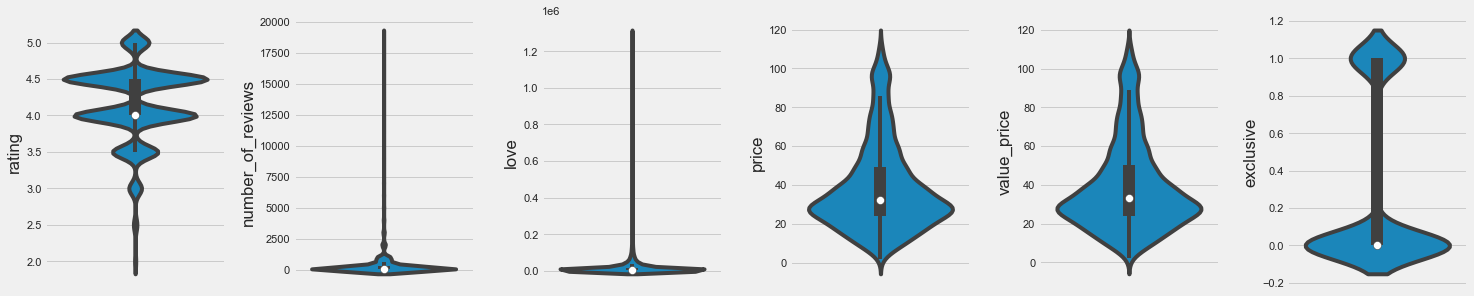

In [31]:
for i in range(0, len(numerik[1:])):
    plt.subplot(2, round(len(numerik[1:])), i+1)
    sns.violinplot(y=df_clean[numerik[i+1]], orient='v')
    plt.tight_layout()

1. price_scale --> distribusi mendekati normal
2. value_price_scale --> distribusi mendekati normal
3. number_of_reviews_scale & love_scale --> distribusi ke kiri
4. rating normal (mungkin)
5. exclusive --> target

In [32]:
df_mean_exclusive = df_clean.groupby(['exclusive']).mean().reset_index()
df_mean_exclusive.iloc[0,2:]


rating                   4.162407
number_of_reviews      329.872985
love                 17548.031656
price                   41.511838
value_price             41.933289
Name: 0, dtype: float64

In [33]:
df_exclusive_0 = df_clean[df_clean['exclusive'] == 0].reset_index(drop=True)
df_exclusive_1 = df_clean[df_clean['exclusive'] == 1].reset_index(drop=True)

In [34]:
for i in df_mean_exclusive.columns[2:]:
    df_exclusive_0[i+'_yes_no_mean'] = df_exclusive_0[i] > df_mean_exclusive[i][0]
    df_exclusive_1[i+'_yes_no_mean'] = df_exclusive_1[i] > df_mean_exclusive[i][1]

In [35]:
df_exclusive = df_exclusive_0.append(df_exclusive_1)
df_exclusive.reset_index(drop=True, inplace=True)
df_exclusive

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive,rating_yes_no_mean,number_of_reviews_yes_no_mean,love_yes_no_mean,price_yes_no_mean,value_price_yes_no_mean
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0,True,False,False,True,True
1,6528,Givenchy,Perfume,4.5,94.0,3000.0,78.0,78.0,0,True,False,False,True,True
2,7393,BVLGARI,Cologne,5.0,31.0,3300.0,94.0,94.0,0,True,False,False,True,True
3,7740,Yves Saint Laurent,Perfume,4.5,164.0,4200.0,62.0,62.0,0,True,False,False,True,True
4,11023,Carolina Herrera,Perfume,4.5,127.0,2900.0,86.0,86.0,0,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2291417,Kitsch,Hair Accessories,5.0,2.0,729.0,29.0,29.0,1,True,False,False,False,False
6996,2291425,Kitsch,Hair Accessories,5.0,4.0,717.0,29.0,29.0,1,True,False,False,False,False
6997,2291433,Kitsch,Hair Accessories,5.0,1.0,920.0,29.0,29.0,1,True,False,False,False,False
6998,2291458,Kitsch,Hair Accessories,3.5,4.0,704.0,29.0,29.0,1,False,False,False,False,False


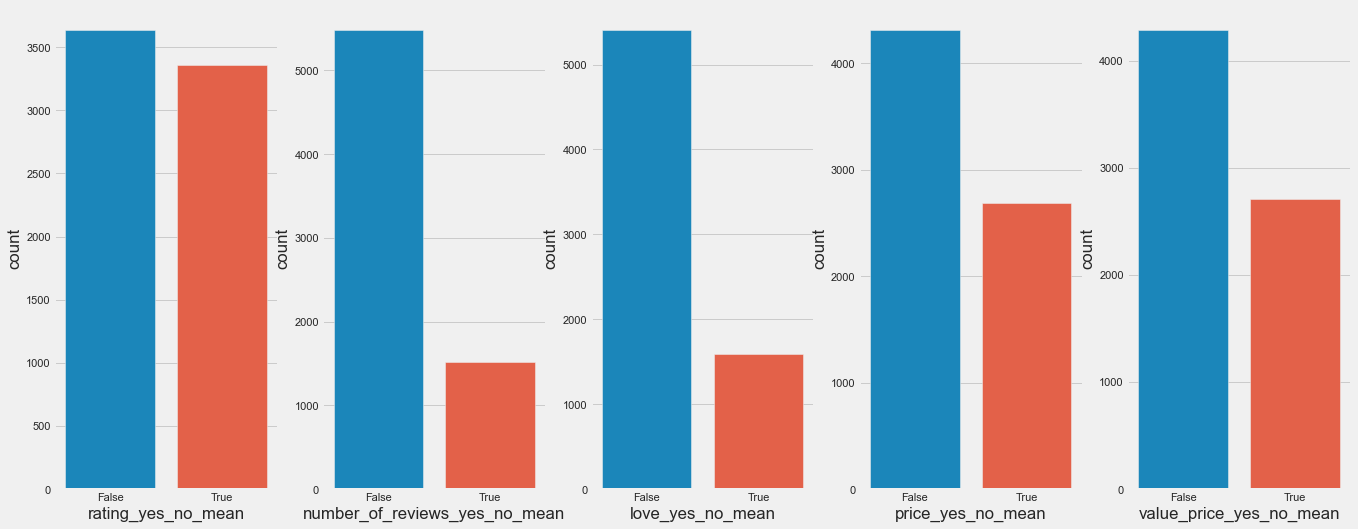

In [36]:
for i in range(0, len(df_exclusive.columns[9:])):
    plt.subplot(1, round(len(df_exclusive.columns[9:])), i+1)
    sns.countplot(x=df_exclusive.columns[9:][i], data=df_exclusive)

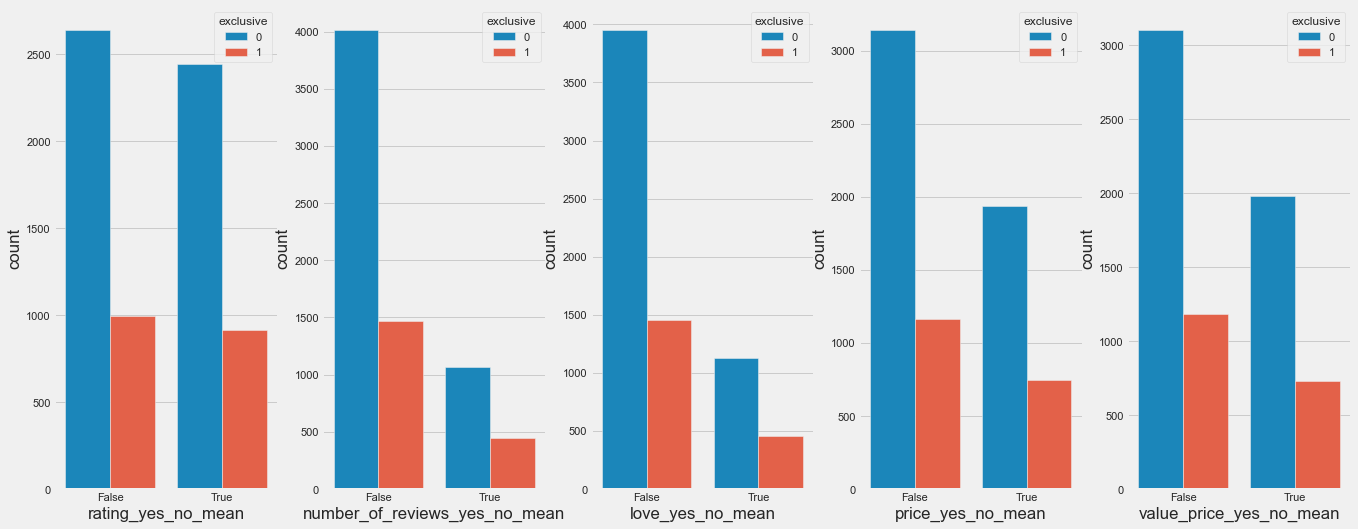

In [37]:
for i in range(0, len(df_exclusive.columns[9:])):
    plt.subplot(1, round(len(df_exclusive.columns[9:])), i+1)
    sns.countplot(x=df_exclusive.columns[9:][i], hue='exclusive', data=df_exclusive)
    # sns.barplot(x=df_exclusive.columns[9:][i], y='exclusive', data=df_exclusive)

dapat dilihat dari grafik setiap data yang FALSE excluvie maupun tidak exclusive selalu melebihi data yang TRUE

### Multivariate Analysis (10 Poin)

<AxesSubplot:>

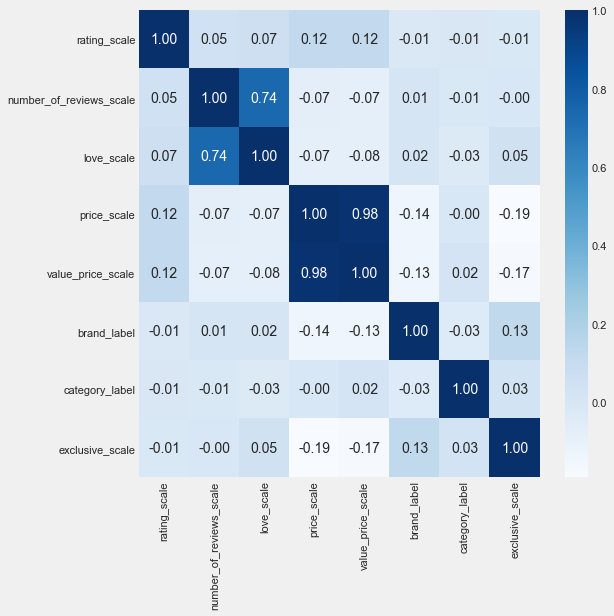

In [38]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_scale.corr(), cmap='Blues', annot=True, fmt='.2f')

## Insight (20 Poin)

Apa saja insight yang kamu temukan dari hasil-hasil analisis di atas?

- fitur love_scale dengan number_of_review sangat berakitan dengan score 0.74
- exclusive berkaitan paling tinggi dengan price_scale dengan nilai -0.19, diikuti oleh value_price_scale dengan nilai -0.17 dan terakhir adalah brand label dengan score 0.13

# Data Preparation

# Conclusion (10 Poin)

Menurutmu, mana saja 3 pre-processing yang paling memberikan impact?

1. Data cleaning (Missing values and Duplicate)
2. Data outliers
3. Normalization/Standardization